      Height  Weight  Diameter  Length
0      0.135  0.6770     0.420   0.530
1      0.150  0.7775     0.415   0.530
2      0.125  0.7680     0.425   0.545
3      0.150  0.8945     0.440   0.550
4      0.140  0.6065     0.380   0.525
...      ...     ...       ...     ...
3995   0.170  1.3655     0.520   0.650
3996   0.170  1.2760     0.495   0.650
3997   0.160  1.2075     0.495   0.650
3998   0.205  1.4275     0.525   0.650
3999   0.175  1.1550     0.510   0.650

[4000 rows x 4 columns]


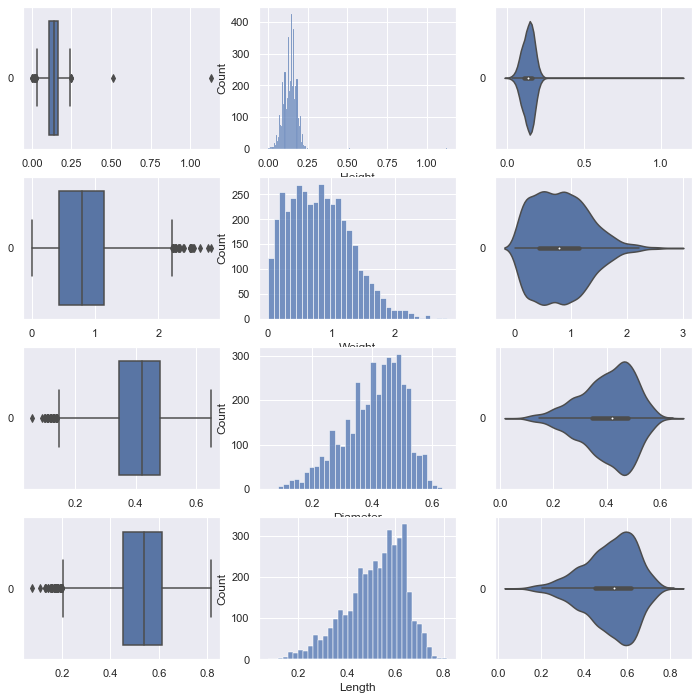

In [90]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sb.set()
print(data.head(4000))
data = pd.read_csv('ProgrammingQuiz_Dataset.csv')
data.describe()
f, axes = plt.subplots(4, 3, figsize=(12, 12))
i = 0
for object in data:
    sb.boxplot(data = data[object], orient = "h", ax = axes[i,0])
    sb.histplot(data = data[object], ax = axes[i,1])
    sb.violinplot(data = data[object], orient = "h", ax = axes[i,2])
    i+=1

<AxesSubplot:xlabel='Height', ylabel='Count'>

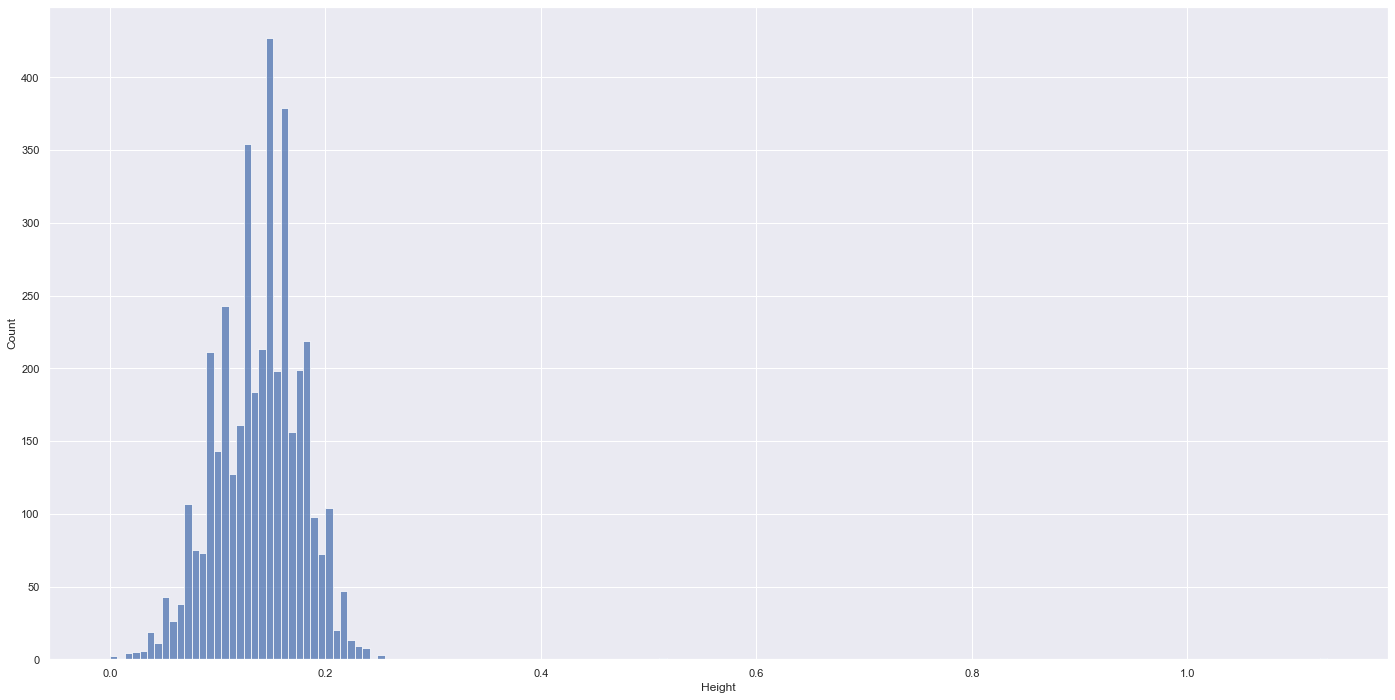

In [63]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
i = 0
sb.histplot(data = data['Height'], ax = axes)


In [53]:
    i=0
    for object in data:
        Q1 = data[object].quantile(0.25)
        Q3 = data[object].quantile(0.75)
        IQR = Q3-Q1
        out = ((data[object] < (Q1 - 1.5 * IQR)) | (data[object] > (Q3 + 1.5 * IQR))).sum()
        print("{} has {} outliers".format(object, out))
        i+=1

Height has 17 outliers
Weight has 27 outliers
Diameter has 43 outliers
Length has 49 outliers


            Height    Weight  Diameter    Length
Height    1.000000  0.817782  0.831975  0.825734
Weight    0.817782  1.000000  0.925831  0.925393
Diameter  0.831975  0.925831  1.000000  0.987054
Length    0.825734  0.925393  0.987054  1.000000


<AxesSubplot:>

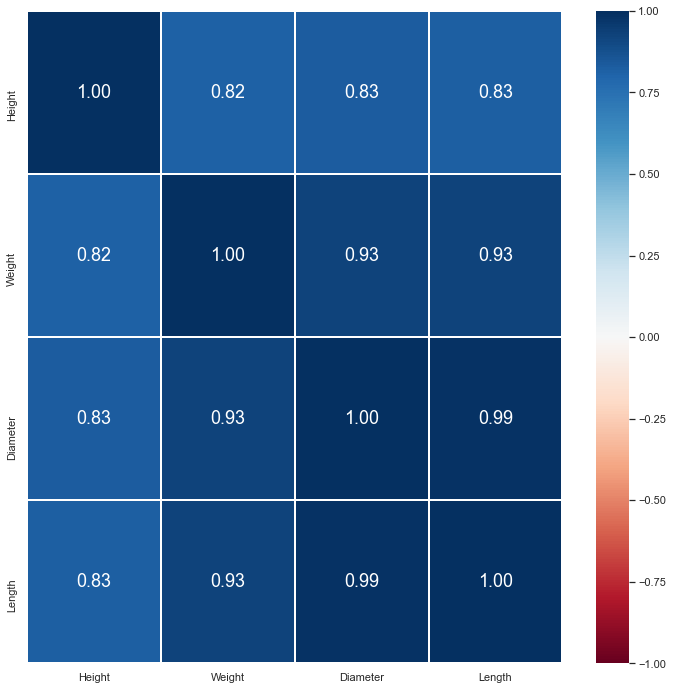

In [58]:
print(data.corr())
f = plt.figure(figsize=(12, 12))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

diameter has highest corelation.
diameter is a good variable in predicting length

In [76]:
print(data['Length'])

0       0.530
1       0.530
2       0.545
3       0.550
4       0.525
        ...  
3995    0.650
3996    0.650
3997    0.650
3998    0.650
3999    0.650
Name: Length, Length: 4000, dtype: float64


No handles with labels found to put in legend.


For uni-variate regression of Length against Height
Intercept 	: b =  [0.20562305]
Coefficients 	: a =  [[2.27766888]]


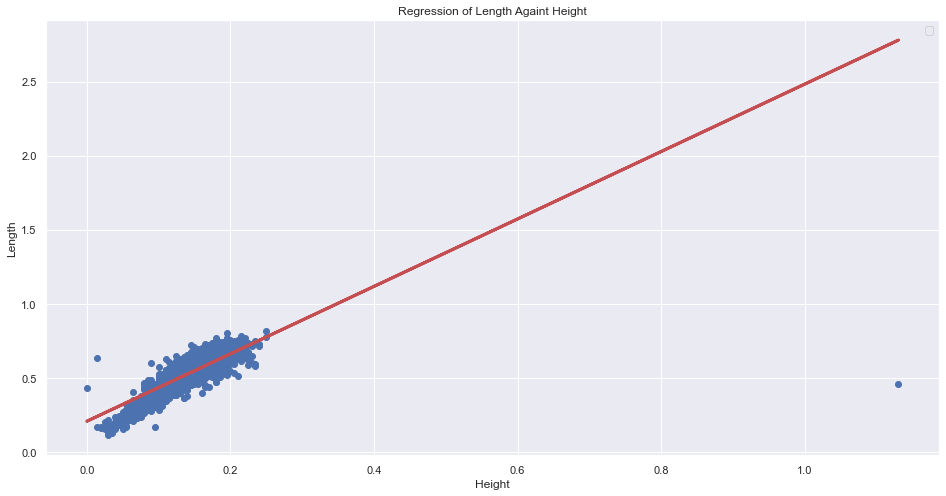

No handles with labels found to put in legend.


For uni-variate regression of Length against Weight
Intercept 	: b =  [0.33347086]
Coefficients 	: a =  [[0.22965376]]


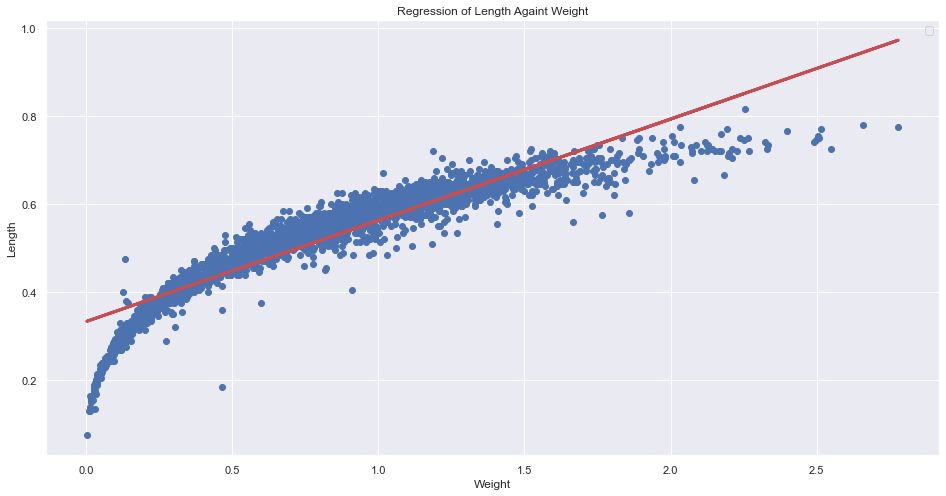

No handles with labels found to put in legend.


For uni-variate regression of Length against Diameter
Intercept 	: b =  [0.03744679]
Coefficients 	: a =  [[1.19324295]]


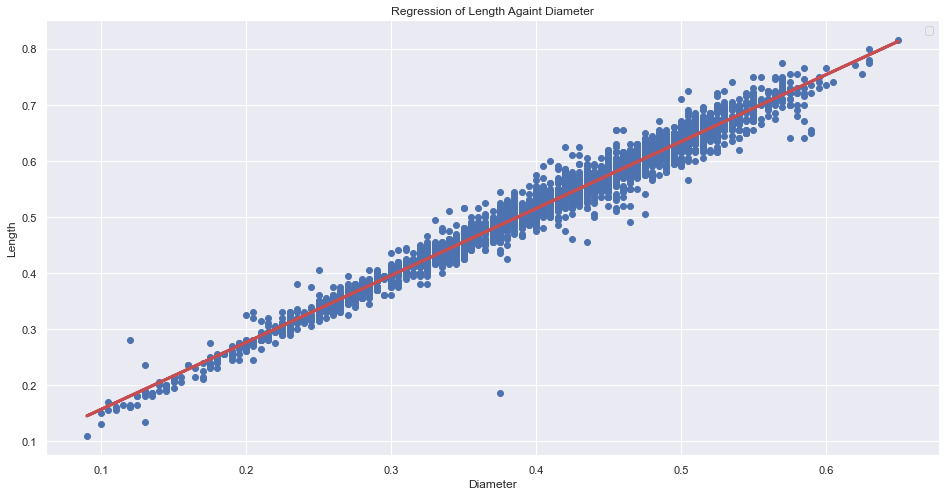

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
i = 0
for object in data:
    if object == "Length":
        continue
    y = pd.DataFrame(data['Length'])
    X = pd.DataFrame(data[object])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
    #print("Train Set :", x_train.shape, y_train.shape)
    #print("Test Set  :", x_test.shape, y_test.shape)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    print("For uni-variate regression of Length against {}".format(object))
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    plt.scatter(X_train, y_train)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.title("Regression of Length Againt {}".format(object))
    plt.xlabel(object)
    plt.ylabel("Length")
    plt.legend()
    plt.show()
    

Explained Variance (R^2) 	: 0.7892485188647562
Mean Squared Error (MSE) 	: 0.0030206330198232515


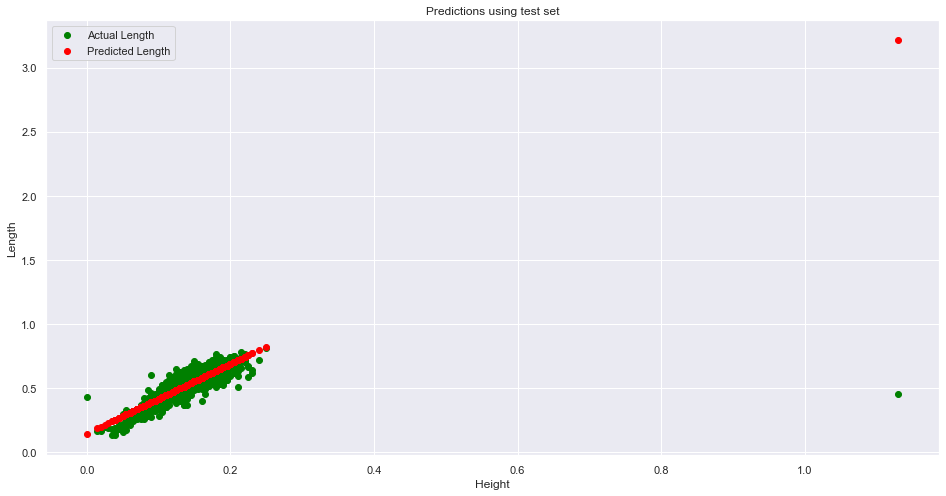

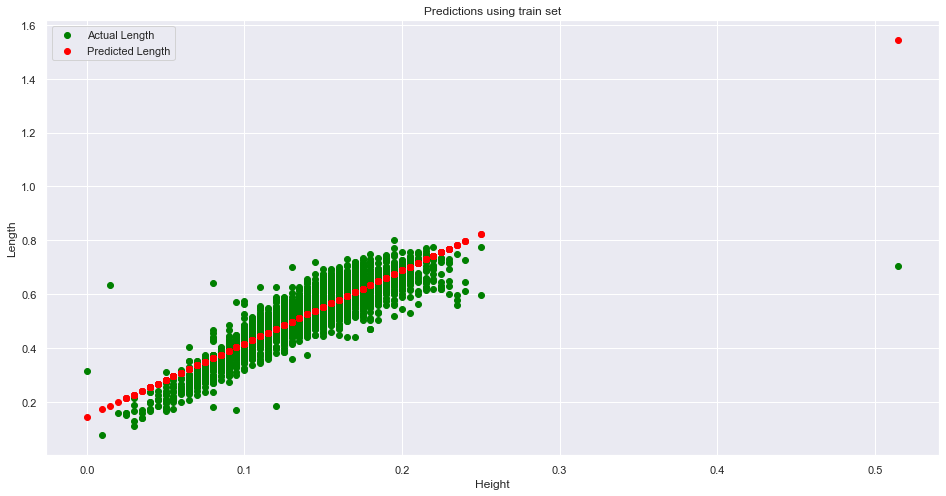

Explained Variance (R^2) 	: 0.8574982597143086
Mean Squared Error (MSE) 	: 0.0020707746975100593


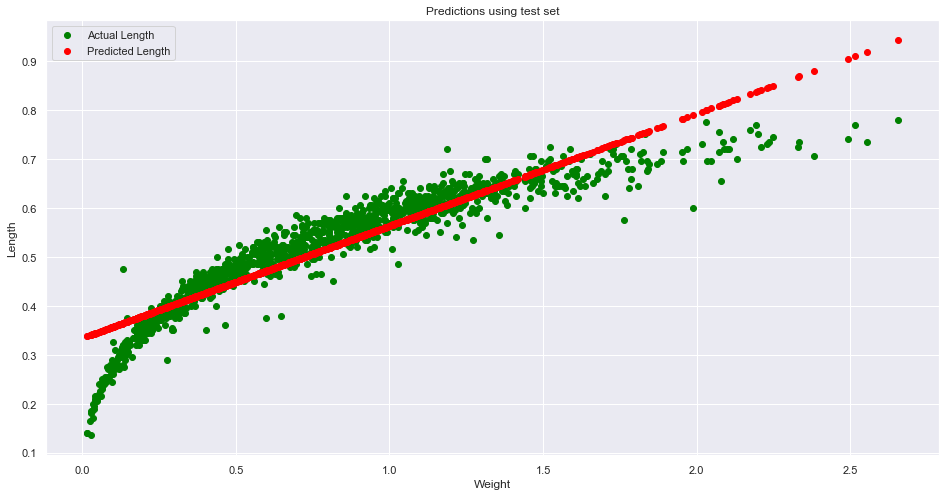

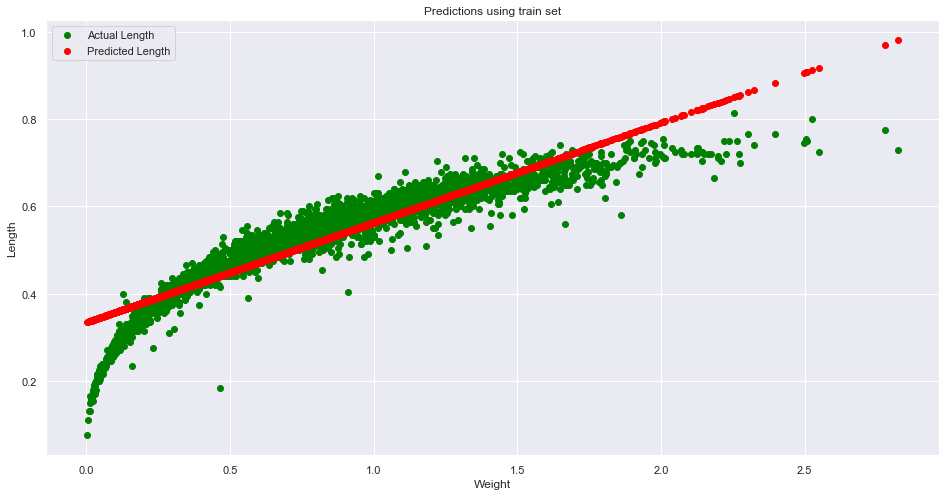

Explained Variance (R^2) 	: 0.9754186281466491
Mean Squared Error (MSE) 	: 0.00036016930171298795


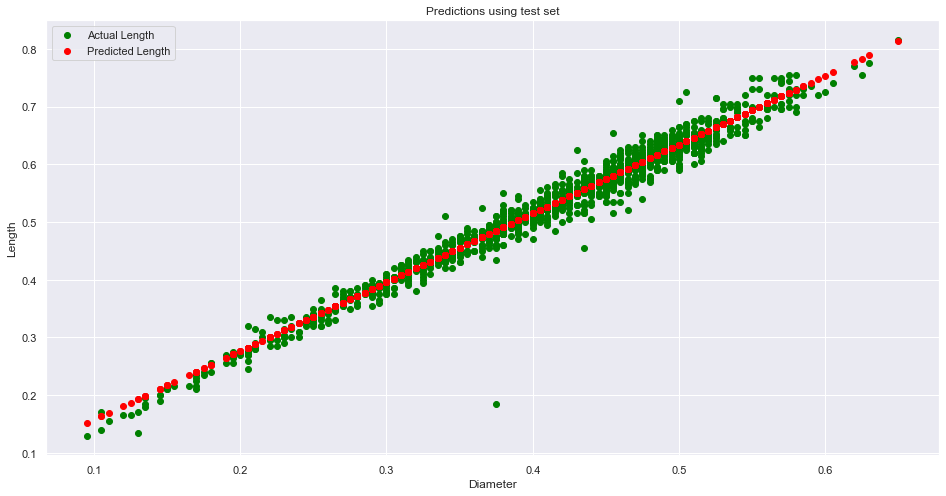

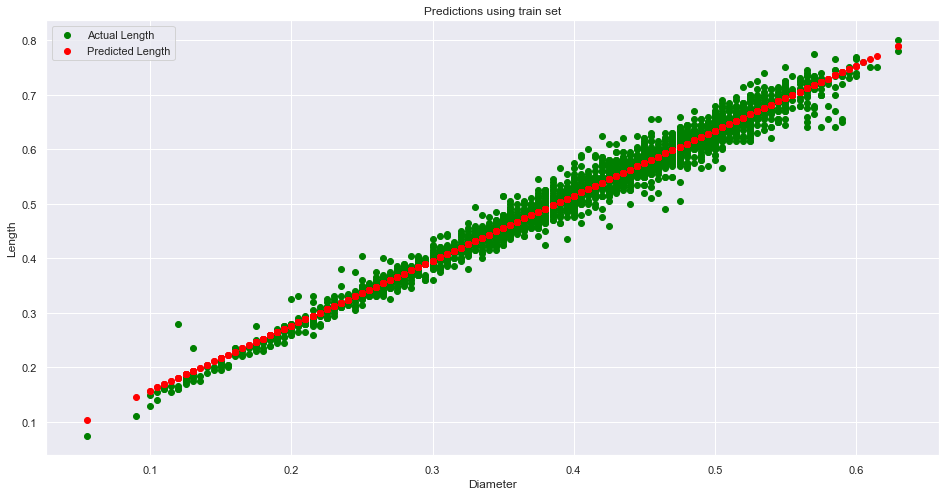

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
i = 0
for object in data:
    if object == "Length":
        continue
    y = pd.DataFrame(data['Length'])
    X = pd.DataFrame(data[object])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
    #print("Train Set :", x_train.shape, y_train.shape)
    #print("Test Set  :", x_test.shape, y_test.shape)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    # Explained Variance in simply the "Score"
    
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

    # Predict the response on the train set
    y_train_pred = linreg.predict(X_train)

    # Compute MSE on the train set
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    
    # Predict SalePrice values corresponding to Predictor
    y_test_pred = linreg.predict(X_test)

    # Plot the Predictions on a Scatterplot
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_test, y_test, color = "green", label = "Actual Length")
    plt.scatter(X_test, y_test_pred, color = "red", label = "Predicted Length")
    plt.xlabel(object)
    plt.ylabel("Length")
    plt.title("Predictions using test set")
    plt.legend()
    plt.show()
    
    y_train_pred = linreg.predict(X_train)

    # Plot the Predictions on a Scatterplot
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_train, y_train, color = "green", label = "Actual Length")
    plt.scatter(X_train, y_train_pred, color = "red", label = "Predicted Length")
    plt.xlabel(object)
    plt.ylabel("Length")
    plt.title("Predictions using train set")
    plt.legend()
    plt.show()
    

In [107]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(data['Length'])
X = pd.DataFrame(data[['Height','Diameter','Weight']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (2800, 3) (2800, 1)
Test Set  : (1200, 3) (1200, 1)


LinearRegression()

In [108]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [0.06057278]
Coefficients 	: a =  [[0.01264517 1.08540285 0.02259972]]


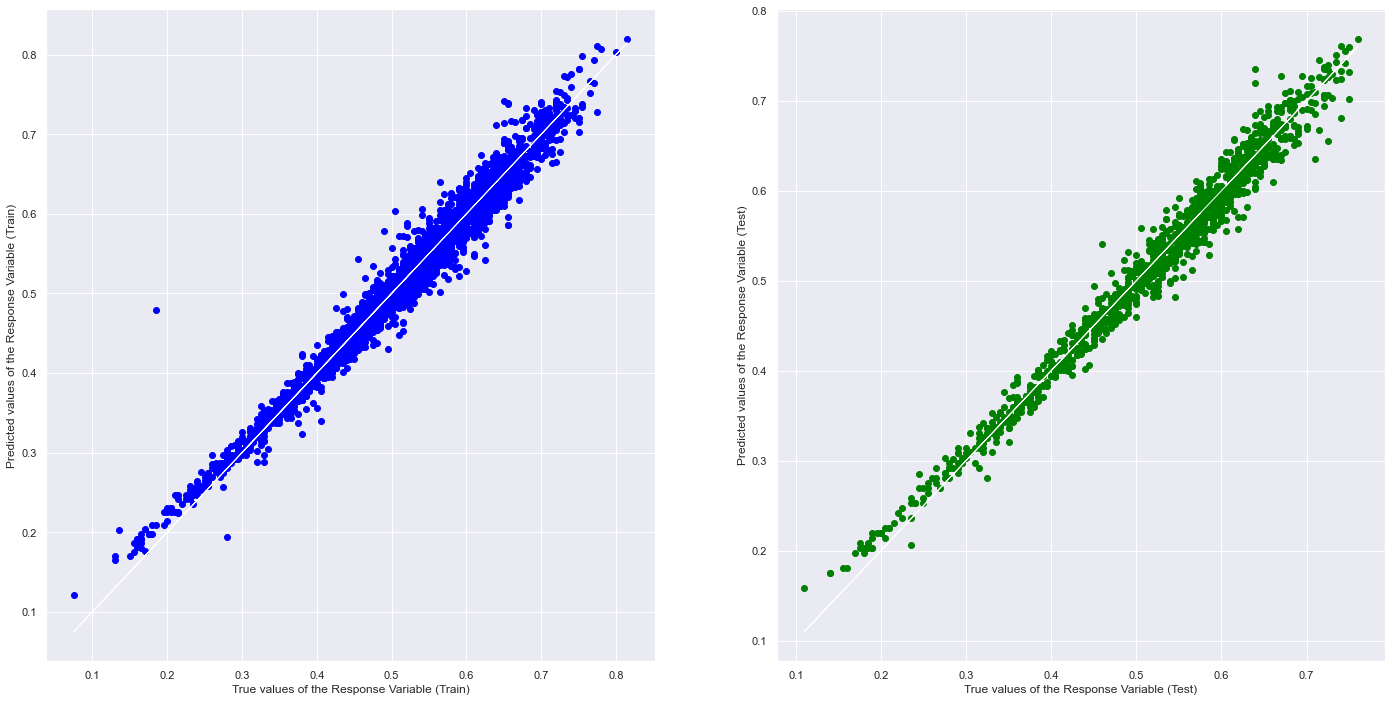

In [109]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [113]:
from sklearn.metrics import mean_squared_error
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9728941671843085
Mean Squared Error (MSE) on Train Set 	: 0.027850393321035578
Mean Squared Error (MSE) on Test Set 	: 0.028874007794028718
